In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
import csv
import os
direc = os.getcwd()

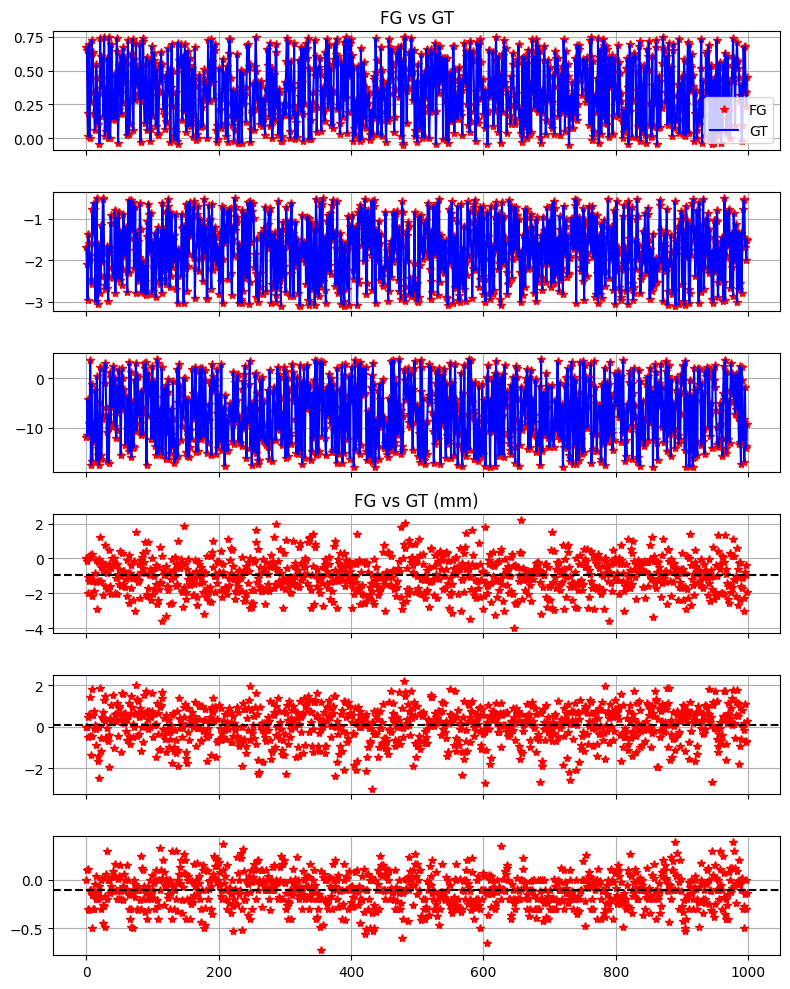

In [16]:
# slakc
rows = []
with open(direc + "/GT_pose_slakc.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        rows.append(row)
x_gt_slakc = [float(row[0]) for row in rows]
y_gt_slakc = [float(row[1]) for row in rows]
z_gt_slakc = [float(row[2]) for row in rows]

rows = []
with open(direc + "/Optimized_pose_slakc.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        rows.append(row)
x_op_slakc = [float(row[0]) for row in rows]
y_op_slakc = [float(row[1]) for row in rows]
z_op_slakc = [float(row[2]) for row in rows]

# error
tr_errors_x_slakc =[]
tr_errors_y_slakc =[]
tr_errors_z_slakc =[]
for i in range(len(x_op_slakc)):
    tr_errors_x_slakc.append((x_gt_slakc[i] - x_op_slakc[i])*1000)
    tr_errors_y_slakc.append((y_gt_slakc[i] - y_op_slakc[i])*1000)
    tr_errors_z_slakc.append((z_gt_slakc[i] - z_op_slakc[i])*1000)

# slakc plot
fig = plt.figure(figsize=(8,10))
ax = fig.subplots(6,1, sharex = True)
ax[0].plot(x_op_slakc,'r*')
ax[1].plot(y_op_slakc,'r*')
ax[2].plot(z_op_slakc,'r*')
ax[0].plot(x_gt_slakc,'b')
ax[1].plot(y_gt_slakc,'b')
ax[2].plot(z_gt_slakc,'b')
ax[0].set_title('FG vs GT')
ax[0].legend(['FG', 'GT'])

ax[3].plot(tr_errors_x_slakc,'r*')
ax[4].plot(tr_errors_y_slakc,'r*')
ax[5].plot(tr_errors_z_slakc,'r*')
ax[3].axhline(np.mean(tr_errors_x_slakc), color='black', linestyle='--', label='Mean')
ax[4].axhline(np.mean(tr_errors_y_slakc), color='black', linestyle='--', label='Mean')
ax[5].axhline(np.mean(tr_errors_z_slakc), color='black', linestyle='--', label='Mean')
ax[3].set_title('FG vs GT (mm)')
[ax[i].grid(True) for i in range(6)]
plt.tight_layout()

plt.show()

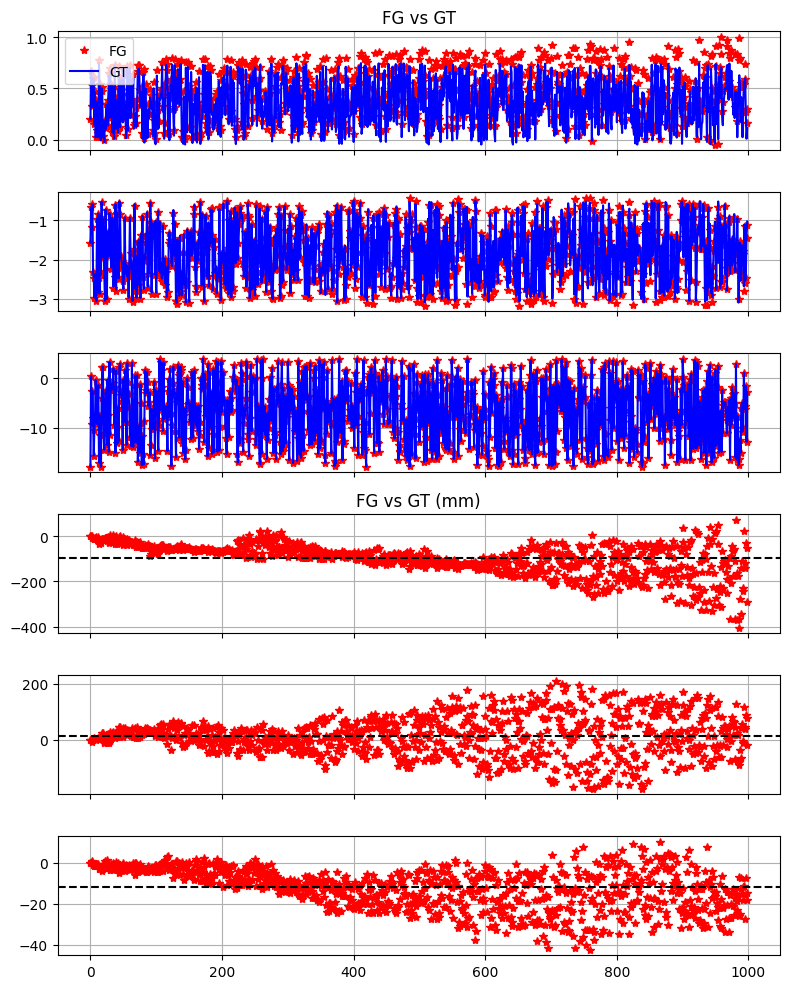

In [26]:
# localization
rows = []
with open(direc + "/GT_pose_localization.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        rows.append(row)
x_gt_localization = [float(row[0]) for row in rows]
y_gt_localization = [float(row[1]) for row in rows]
z_gt_localization = [float(row[2]) for row in rows]

rows = []
with open(direc + "/Optimized_pose_localization.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        rows.append(row)
x_op_localization = [float(row[0]) for row in rows]
y_op_localization = [float(row[1]) for row in rows]
z_op_localization = [float(row[2]) for row in rows]

# error
tr_errors_x =[]
tr_errors_y =[]
tr_errors_z =[]
for i in range(len(x_op_localization)):
    tr_errors_x.append((x_gt_localization[i] - x_op_localization[i])*1000)
    tr_errors_y.append((y_gt_localization[i] - y_op_localization[i])*1000)
    tr_errors_z.append((z_gt_localization[i] - z_op_localization[i])*1000)
   
# localization plot
fig = plt.figure(figsize=(8,10))
ax = fig.subplots(6,1, sharex = True)
ax[0].plot(x_op_localization,'r*')
ax[1].plot(y_op_localization,'r*')
ax[2].plot(z_op_localization,'r*')
ax[0].plot(x_gt_localization,'b')
ax[1].plot(y_gt_localization,'b')
ax[2].plot(z_gt_localization,'b')
ax[0].set_title('FG vs GT')
ax[0].legend(['FG', 'GT'])

ax[3].plot(tr_errors_x,'r*')
ax[4].plot(tr_errors_y,'r*')
ax[5].plot(tr_errors_z,'r*')
ax[3].axhline(np.mean(tr_errors_x), color='black', linestyle='--', label='Mean')
ax[4].axhline(np.mean(tr_errors_y), color='black', linestyle='--', label='Mean')
ax[5].axhline(np.mean(tr_errors_z), color='black', linestyle='--', label='Mean')
ax[3].set_title('FG vs GT (mm)')
[ax[i].grid(True) for i in range(6)]
plt.tight_layout()

plt.show()

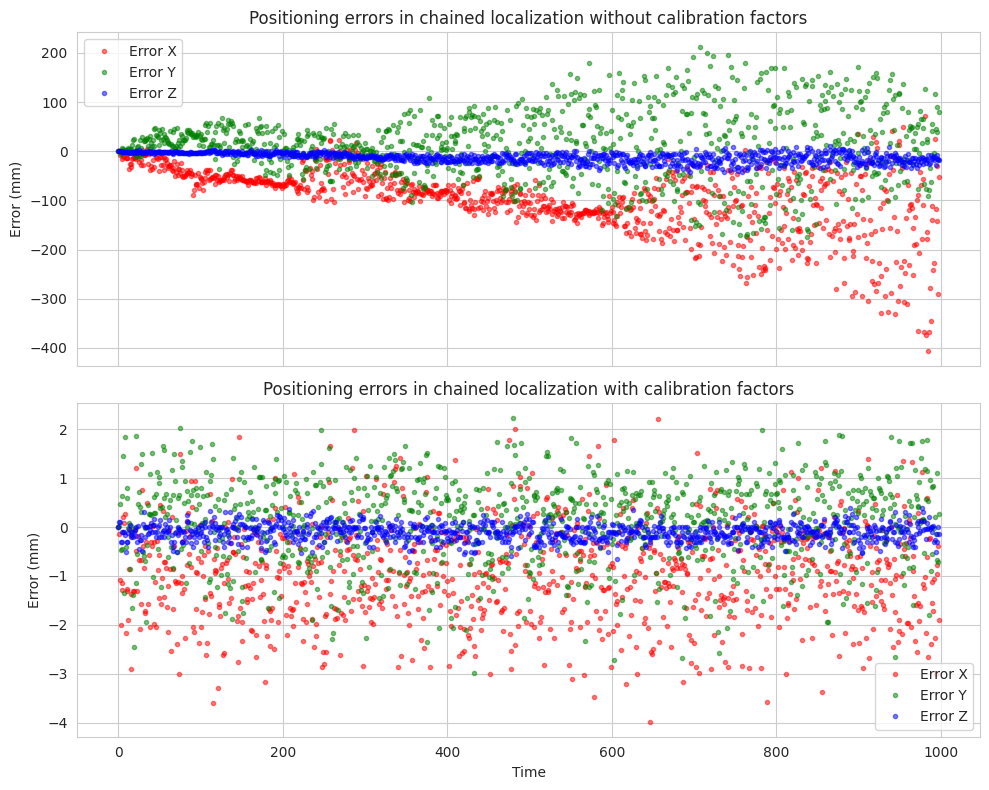

In [36]:
# Create a new figure with two subplots
fig, (ax_errors, ax_slack) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the error data
ax_errors.plot(tr_errors_x, 'ro', markersize=3, label='Error X', alpha=0.5)
ax_errors.plot(tr_errors_y, 'go', markersize=3, label='Error Y', alpha=0.5)
ax_errors.plot(tr_errors_z, 'bo', markersize=3, label='Error Z', alpha=0.5)
ax_errors.set_title('Positioning errors in chained localization without calibration factors')
ax_errors.set_ylabel('Error (mm)')
ax_errors.legend()
ax_errors.grid(True)

# Plot the slack error data
ax_slack.plot(tr_errors_x_slakc, 'ro', markersize=3, label='Error X', alpha=0.5)
ax_slack.plot(tr_errors_y_slakc, 'go', markersize=3, label='Error Y', alpha=0.5)
ax_slack.plot(tr_errors_z_slakc, 'bo', markersize=3, label='Error Z', alpha=0.5)
ax_slack.set_title('Positioning errors in chained localization with calibration factors')
ax_slack.set_xlabel('Time')
ax_slack.set_ylabel('Error (mm)')
ax_slack.legend()
ax_slack.grid(True)

plt.tight_layout()
plt.show()